(8431, 6600)


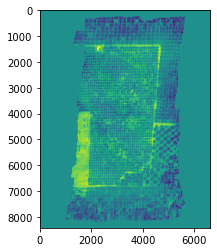

In [12]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from osgeo import gdal, osr
import numpy as np


image = cv2.imread('/home/nvaldebenito/Documents/40_trabajo_jsalinas/output/tif/NDVI.tif').astype(np.float)
# Split into 3 channels, discarding the first and saving the second as R, third as NearIR
_, R, NearIR = cv2.split(image)

# Compute NDVI values for each pixel
image = (NearIR - R) / (NearIR + R + 0.001)
ancho = image.shape[1] #columnas
alto = image.shape[0] # filas
# Rotación
M = cv2.getRotationMatrix2D((ancho//2,alto//2),15,1)

imageOut = cv2.warpAffine(image,M,(ancho,alto))
#imgr = cv2.cvtColor(imageOut,cv2.COLOR_BGR2GRAY)

#imgray = cv2.equalizeHist(imageOut)#global


plt.imshow(imageOut)
print(imageOut.shape)
im = Image.fromarray(imageOut)
im.save('test.tif')

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
try:
    from PIL import Image
except ImportError:
    import Image

# Open image file
image = Image.open('test.tif')

my_dpi=500.


# Set up figure
fig=plt.figure(figsize=(float(image.size[0])/my_dpi,float(image.size[1])/my_dpi),dpi=my_dpi)
ax=fig.add_subplot(111)

# Remove whitespace from around the image
fig.subplots_adjust(left=0,right=1,bottom=0,top=1)

# Set the gridding interval: here we use the major tick interval
myInterval=100.
loc = plticker.MultipleLocator(base=myInterval)
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc)

# Add the grid
ax.grid(which='major', axis='both', linestyle='-')

# Add the image
ax.imshow(image)

# Find number of gridsquares in x and y direction
nx=abs(int(float(ax.get_xlim()[1]-ax.get_xlim()[0])/float(myInterval)))
ny=abs(int(float(ax.get_ylim()[1]-ax.get_ylim()[0])/float(myInterval)))

# Add some labels to the gridsquares
for j in range(ny):
    y=myInterval/2+j*myInterval
    for i in range(nx):
        x=myInterval/2.+float(i)*myInterval
        #ax.text(x,y,'{:d}'.format(i+j*nx),color='w',ha='center',va='center')

# Save the figure
fig.savefig('myImageGrid.tiff',dpi=my_dpi)

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import glob
n='myImageGrid.tiff'
my_dpi=500.
#image = cv2.imread("output/clip_NDVI/NDVI_T2 P6.tif")
image = cv2.imread(n)
print(type(image))
#image = chm_array
output = image.copy()
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imgr = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=100.0, tileGridSize=(8,8))
imgray_ad = clahe.apply(imgr)#adaptive
imgray = cv2.equalizeHist(imgr)#global
res = np.hstack((imgray,imgray_ad))#so we can plot together
#gray = chm_reclass
circles = cv2.HoughCircles(imgray, cv2.HOUGH_GRADIENT,20, 60, param1=70, param2=3,
                           minRadius=10,maxRadius=50)
print(circles)
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(output, (x, y), r, (2, 250, 0),4)
        #cv2.rectangle(output, (x - 3, y - 3), (x + 3, y + 3), (1, 0, 255), -1)
    #plt.subplot(121), plt.imshow(imgray_ad, cmap="gray"), plt.title("corners")
    #plt.xticks([]), plt.yticks([])
    #plt.subplot(122), 
    plt.imshow(output, cmap="gray"), plt.title("corners")
    plt.xticks([]), plt.yticks([])    
    plt.savefig('corners.tiff', dpi=my_dpi)
    plt.show()